### Importing flights dataset from Department of Transportation on flight data from 2015 <br /> <br /> Objective: To query this dataset to gain insight using both Pandas/Python and SQL <br /> <br /> MySQL code can be found in github repository in FlightsSQLProject.sql <br /> <br /> Use matplotlib to visualize data insights at bottom of notebook

In [788]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [789]:
# Importing data
flights = pd.read_csv('flights.csv', low_memory=False)

In [790]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [792]:
airports = pd.read_csv('airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [793]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,5.714008e+06,5.714008e+06,5.819079e+06,5.726566e+06,5.726566e+06,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,1.370062e+02,1.135116e+02,8.223565e+02,1.471469e+03,7.434971e+00,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,7.421107e+01,7.223082e+01,6.077843e+02,5.221879e+02,5.638548e+00,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,1.180000e+02,9.400000e+01,6.470000e+02,1.509000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,1.680000e+02,1.440000e+02,1.062000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [818]:
flights.loc[(flights['MONTH'] == 4)].head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1403471,2015,4,1,3,AS,108,N760AS,ANC,SEA,5,6.0,1.0,9.0,15.0,201.0,196.0,183.0,1448,418.0,4.0,426,422.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403472,2015,4,1,3,US,448,N155UW,SLC,CLT,15,10.0,-5.0,10.0,20.0,232.0,221.0,205.0,1727,545.0,6.0,607,551.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403473,2015,4,1,3,US,794,N563UW,LAX,PHL,15,5.0,-10.0,14.0,19.0,310.0,291.0,272.0,2402,751.0,5.0,825,756.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403474,2015,4,1,3,AA,1230,N3JJAA,SEA,DFW,15,12.0,-3.0,17.0,29.0,235.0,232.0,211.0,1660,600.0,4.0,610,604.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1403475,2015,4,1,3,DL,806,N584NW,SFO,MSP,15,12.0,-3.0,19.0,31.0,212.0,195.0,171.0,1589,522.0,5.0,547,527.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [819]:
flights.sort_values('AIRLINE').head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
393262,2015,1,26,1,AA,1221,N3FMAA,MCO,ORD,1925,2016.0,51.0,12.0,2028.0,174.0,174.0,153.0,1005,2201.0,9.0,2119,2210.0,51.0,0,0,NaN,0.0,0.0,51.0,0.0,0.0
2248164,2015,5,23,6,AA,1047,N586AA,SLC,DFW,730,728.0,-2.0,14.0,742.0,156.0,171.0,144.0,989,1106.0,13.0,1106,1119.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3902560,2015,8,30,7,AA,793,N758US,CLT,STL,2029,2022.0,-7.0,17.0,2039.0,114.0,107.0,85.0,575,2104.0,5.0,2123,2109.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2248165,2015,5,23,6,AA,1145,N3CSAA,ORD,SFO,730,730.0,0.0,19.0,749.0,286.0,275.0,254.0,1846,1003.0,2.0,1016,1005.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2248166,2015,5,23,6,AA,1327,N028AA,DFW,MEM,730,723.0,-7.0,14.0,737.0,94.0,85.0,65.0,431,842.0,6.0,904,848.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [820]:
flights.filter(['AIRLINE', 'TAIL_NUMBER']).head()

,AIRLINE,TAIL_NUMBER
0,AS,N407AS
1,AA,N3KUAA
2,US,N171US
3,AA,N3HYAA
4,AS,N527AS


In [821]:
flights.query('DAY_OF_WEEK == 2').head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
79025,2015,1,6,2,AA,2400,N3ENAA,LAX,DFW,5,5.0,0.0,20.0,25.0,169.0,182.0,157.0,1235,502.0,5.0,454,507.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79026,2015,1,6,2,AS,98,N597AS,ANC,SEA,5,2351.0,-14.0,19.0,10.0,205.0,194.0,171.0,1448,401.0,4.0,430,405.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79027,2015,1,6,2,US,2020,N289AY,PHX,CLT,15,12.0,-3.0,17.0,29.0,214.0,232.0,199.0,1773,548.0,16.0,549,604.0,15.0,0,0,NaN,15.0,0.0,0.0,0.0,0.0
79028,2015,1,6,2,AA,258,N3KJAA,LAX,MIA,20,16.0,-4.0,19.0,35.0,284.0,297.0,266.0,2342,801.0,12.0,804,813.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79029,2015,1,6,2,AS,135,N435AS,SEA,ANC,25,23.0,-2.0,18.0,41.0,235.0,213.0,191.0,1448,252.0,4.0,320,256.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [822]:
flights.groupby('ORIGIN_AIRPORT').count().head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10135,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,0,41,41,41,41,41
10136,201,201,201,201,201,201,201,201,201,194,194,194,194,201,192,192,201,194,194,201,194,192,201,201,7,22,22,22,22,22
10140,1816,1816,1816,1816,1816,1816,1816,1816,1816,1810,1810,1809,1809,1816,1805,1805,1816,1809,1809,1816,1809,1805,1816,1816,7,236,236,236,236,236
10141,71,71,71,71,71,71,71,71,71,70,70,70,70,71,70,70,71,70,70,71,70,70,71,71,1,9,9,9,9,9
10146,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,87,87,87,87,87,86,87,87,0,11,11,11,11,11


### 1. What flights were the most delayed in 2015? (Top 10)

In [799]:
# Need to create join between flights.csv and airlines.csv 
# To obtain airline name
df1 = flights.set_index('AIRLINE').join(airlines.set_index('IATA_CODE'))

In [800]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
AA,2015,1,1,4,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
AA,2015,1,1,4,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
AA,2015,1,1,4,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
AA,2015,1,1,4,1674,N853AA,LAS,MIA,35,27.0,-8.0,21.0,48.0,268.0,266.0,238.0,2174,746.0,7.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
AA,2015,1,1,4,371,N3GXAA,SEA,MIA,100,52.0,-8.0,30.0,122.0,338.0,347.0,311.0,2724,933.0,6.0,938,939.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.


In [801]:
# Sorting by departure delay time
df = df1.sort_values(by = 'DEPARTURE_DELAY', ascending=False)
df = df[['AIRLINE', 'MONTH', 'DAY','YEAR', 'DEPARTURE_DELAY', 'CANCELLED']]

In [802]:
# Showing results with omitting flights that were cancelled
df.loc[df['CANCELLED'] == 0].head(10) # To show top 10 results

,AIRLINE,MONTH,DAY,YEAR,DEPARTURE_DELAY,CANCELLED
AA,American Airlines Inc.,1,23,2015,1988.0,0
AA,American Airlines Inc.,8,1,2015,1878.0,0
AA,American Airlines Inc.,9,13,2015,1670.0,0
AA,American Airlines Inc.,12,31,2015,1649.0,0
AA,American Airlines Inc.,11,27,2015,1631.0,0
AA,American Airlines Inc.,7,13,2015,1625.0,0
AA,American Airlines Inc.,3,24,2015,1609.0,0
AA,American Airlines Inc.,1,18,2015,1604.0,0
AA,American Airlines Inc.,3,4,2015,1589.0,0
AA,American Airlines Inc.,2,28,2015,1587.0,0


### SQL and Pandas query both confirm 10 worst flights in terms of delay in 2015 were from American Airlines

### 2. What is the average delay for each airline in minutes?

In [803]:
# Group by airline
# Obtain average departure delay per airline
df_avg_delay = df1.groupby(['AIRLINE'])['DEPARTURE_DELAY'].mean()

In [804]:
# Sort values from greatest departure delay to least
print(df_avg_delay.sort_values(ascending = False))

AIRLINE
Spirit Air Lines                15.944766
United Air Lines Inc.           14.435441
Frontier Airlines Inc.          13.350858
JetBlue Airways                 11.514353
Southwest Airlines Co.          10.581986
American Eagle Airlines Inc.    10.125188
Virgin America                   9.022595
American Airlines Inc.           8.900856
Atlantic Southeast Airlines      8.715934
Skywest Airlines Inc.            7.801104
Delta Air Lines Inc.             7.369254
US Airways Inc.                  6.141137
Alaska Airlines Inc.             1.785801
Hawaiian Airlines Inc.           0.485713
Name: DEPARTURE_DELAY, dtype: float64


### 3. How many of each airline's flights were delayed over 30 minutes?

In [805]:
# Calculate delay_fraction
# Need A. How many flights per airline were delayed over 30 minutes
# B. Total number of flights per airline
# delay_fraction = A / B, sort by delay_fraction

# Query dataset to only include flights w/ departure delays greater than 30min
df_30min_delay = df1.query('DEPARTURE_DELAY > 30')

In [806]:
# A
df_30min_delay.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
AA,2015,1,1,4,1057,N3ASAA,DFW,MIA,515,703.0,108.0,15.0,718.0,161.0,155.0,133.0,1121,1031.0,7.0,856,1038.0,102.0,0,0,NaN,0.0,0.0,0.0,0.0,102.0,American Airlines Inc.
AA,2015,1,1,4,89,N3KVAA,IAH,MIA,520,618.0,58.0,19.0,637.0,141.0,137.0,111.0,964,928.0,7.0,841,935.0,54.0,0,0,NaN,0.0,0.0,54.0,0.0,0.0,American Airlines Inc.
AA,2015,1,1,4,328,N4XKAA,DEN,DFW,530,623.0,53.0,32.0,655.0,125.0,138.0,96.0,641,931.0,10.0,835,941.0,66.0,0,0,NaN,13.0,0.0,53.0,0.0,0.0,American Airlines Inc.
AA,2015,1,1,4,2299,N3LLAA,JFK,MIA,545,640.0,55.0,17.0,657.0,185.0,199.0,152.0,1089,929.0,30.0,850,959.0,69.0,0,0,NaN,14.0,0.0,55.0,0.0,0.0,American Airlines Inc.
AA,2015,1,1,4,233,N3BEAA,BWI,MIA,600,643.0,43.0,21.0,704.0,163.0,151.0,124.0,946,908.0,6.0,843,914.0,31.0,0,0,NaN,0.0,0.0,31.0,0.0,0.0,American Airlines Inc.


In [807]:
# Group by airline, obtain number of flights having departure delay greater than 30min
df_delay_count = df_30min_delay.groupby('AIRLINE').count()

In [808]:
# Sort values
df_delay_count = df_delay_count['DEPARTURE_DELAY'].sort_values(ascending = False)

In [809]:
# Convert Pandas series into dataframe
df_delay_count = df_delay_count.to_frame()

In [810]:
# Resetting index to obtain Airline as column 
# So we can easily join later
df_delay_count.reset_index(inplace = True)
df_delay_count

,AIRLINE,DEPARTURE_DELAY
0,Southwest Airlines Co.,146585
1,American Airlines Inc.,76339
2,United Air Lines Inc.,74001
3,Delta Air Lines Inc.,69353
4,Atlantic Southeast Airlines,64128
5,Skywest Airlines Inc.,63574
6,JetBlue Airways,36693
7,American Eagle Airlines Inc.,36480
8,Spirit Air Lines,20876
9,US Airways Inc.,17155


In [811]:
# B: total number of flights per airline
df_total = df1.groupby('AIRLINE').count()
df_total.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
AIRLINE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alaska Airlines Inc.,172521,172521,172521,172521,172521,172521,172521,172521,172521,171910,171910,171881,171881,172521,171439,171439,172521,171692,171692,172521,171692,171439,172521,172521,669,22352,22352,22352,22352,22352
American Airlines Inc.,725984,725984,725984,725984,725984,723673,725984,725984,725984,715598,715598,715127,715127,725984,712935,712935,725984,714855,714855,725984,714855,712935,725984,725984,10919,130279,130279,130279,130279,130279
American Eagle Airlines Inc.,294632,294632,294632,294632,294632,294584,294632,294632,294632,280282,280282,279728,279728,294632,278791,278791,294632,279431,279431,294632,279431,278791,294632,294632,15025,60547,60547,60547,60547,60547
Atlantic Southeast Airlines,571977,571977,571977,571977,571977,571907,571977,571977,571977,557294,557294,556866,556866,571977,554752,554752,571977,556425,556425,571977,556425,554752,571977,571977,15231,109184,109184,109184,109184,109184
Delta Air Lines Inc.,875881,875881,875881,875881,875881,875855,875881,875881,875881,872177,872177,872094,872094,875881,870275,870275,875881,871946,871946,875881,871946,870275,875881,875881,3824,118023,118023,118023,118023,118023


In [812]:
df_total = df_total['YEAR'].sort_values(ascending = False) 
# Chose some column ('YEAR') to get total count
# DEPARTURE_DELAY column contains some null values, can't use that column

In [813]:
# Converting to dataframe
df_total = df_total.to_frame()

In [814]:
# Making Airline index a column
df_total.reset_index(inplace = True)

In [815]:
df_total

,AIRLINE,YEAR
0,Southwest Airlines Co.,1261855
1,Delta Air Lines Inc.,875881
2,American Airlines Inc.,725984
3,Skywest Airlines Inc.,588353
4,Atlantic Southeast Airlines,571977
5,United Air Lines Inc.,515723
6,American Eagle Airlines Inc.,294632
7,JetBlue Airways,267048
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,172521


In [816]:
# Need to join A and B
# Join Airline w/ Airline
df_30min_join = df_delay_count.set_index('AIRLINE').join(df_total.set_index('AIRLINE')) 
df_30min_join = df_30min_join.rename(columns = {'DEPARTURE_DELAY': '30min_delay_count', 
                               'YEAR': 'total_count'})  # Renaming columns 
df_30min_join

,30min_delay_count,total_count
AIRLINE,,
Southwest Airlines Co.,146585,1261855
American Airlines Inc.,76339,725984
United Air Lines Inc.,74001,515723
Delta Air Lines Inc.,69353,875881
Atlantic Southeast Airlines,64128,571977
Skywest Airlines Inc.,63574,588353
JetBlue Airways,36693,267048
American Eagle Airlines Inc.,36480,294632
Spirit Air Lines,20876,117379


In [817]:
# Calculate delay_fraction and make into new column
df_30min_join['delay_fraction'] = (df_30min_join['30min_delay_count']/
                                  df_30min_join['total_count']) # A / B
df_30min_join.sort_values(by = ['delay_fraction'], ascending = False) # Sort values

,30min_delay_count,total_count,delay_fraction
AIRLINE,,,
Spirit Air Lines,20876,117379,0.177851
Frontier Airlines Inc.,13548,90836,0.149148
United Air Lines Inc.,74001,515723,0.143490
JetBlue Airways,36693,267048,0.137402
American Eagle Airlines Inc.,36480,294632,0.123815
Southwest Airlines Co.,146585,1261855,0.116166
Atlantic Southeast Airlines,64128,571977,0.112116
Virgin America,6772,61903,0.109397
Skywest Airlines Inc.,63574,588353,0.108054


### 4. What is the average runway time per airline?

In [823]:
# Obtain columns of interest
df_runway = df1[['AIRLINE','ELAPSED_TIME', 'AIR_TIME']]

In [824]:
# Calculate runway_time from elapsed_time - air_time
df_runway['runway_time'] = df1['ELAPSED_TIME'] - df1['AIR_TIME']

<ipython-input-824-9a89882096c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runway['runway_time'] = df1['ELAPSED_TIME'] - df1['AIR_TIME']


In [825]:
# Group by airline and find average
df_runway_avg = df_runway.groupby('AIRLINE').mean()

In [826]:
df_runway_avg.sort_values(by = 'runway_time', ascending = False) # Sort values

,ELAPSED_TIME,AIR_TIME,runway_time
AIRLINE,,,
US Airways Inc.,152.402455,125.774234,26.628221
American Airlines Inc.,166.433282,139.806208,26.627074
United Air Lines Inc.,190.745816,164.835886,25.909930
American Eagle Airlines Inc.,92.593516,66.979630,25.613886
Skywest Airlines Inc.,100.724558,75.655010,25.069548
Frontier Airlines Inc.,155.056677,130.240571,24.816106
Delta Air Lines Inc.,140.471965,115.665353,24.806612
Atlantic Southeast Airlines,97.124247,72.763842,24.360404
Spirit Air Lines,156.503598,132.347886,24.155713


### 5. How many flights per airline are on the runway > 45 minutes?

In [827]:
# Query dataset from previous question so that runway_time > 45 min
df_runway_45min = df_runway.query('runway_time > 45')

In [828]:
# Group by airline and obtain number of flights
df_runway_45min_avg = df_runway_45min.groupby('AIRLINE').count()

In [829]:
# Drop unrelated columns
# Interested in count of how many flights w/ runway time greater than 45min
df_runway_45min_avg = df_runway_45min_avg.drop(['ELAPSED_TIME','AIR_TIME'], axis = 1)

In [830]:
df_runway_45min_avg = df_runway_45min_avg.rename(
    columns = {'runway_time':'45min_runway_count'})

In [831]:
df_runway_45min_avg

,45min_runway_count
AIRLINE,
Alaska Airlines Inc.,2198
American Airlines Inc.,38043
American Eagle Airlines Inc.,16855
Atlantic Southeast Airlines,20942
Delta Air Lines Inc.,35645
Frontier Airlines Inc.,3864
Hawaiian Airlines Inc.,244
JetBlue Airways,11848
Skywest Airlines Inc.,21310


In [832]:
# Need to add total again then delay_fraction
df1_total = df_total.set_index('AIRLINE')

In [833]:
df1_total

,YEAR
AIRLINE,
Southwest Airlines Co.,1261855
Delta Air Lines Inc.,875881
American Airlines Inc.,725984
Skywest Airlines Inc.,588353
Atlantic Southeast Airlines,571977
United Air Lines Inc.,515723
American Eagle Airlines Inc.,294632
JetBlue Airways,267048
US Airways Inc.,198715


In [834]:
# Join runway count w/ total count
df_45join = df_runway_45min_avg.join(df1_total)

In [835]:
df_45join = df_45join.rename(columns = {'YEAR': 'total_count'})

In [836]:
# Calculate delay fraction
df_45join['delay_fraction'] = (df_45join['45min_runway_count'] / 
                               df_45join['total_count'])


In [837]:
df_45join.sort_values(by = 'delay_fraction', ascending = False)

,45min_runway_count,total_count,delay_fraction
AIRLINE,,,
US Airways Inc.,11880,198715,0.059784
American Eagle Airlines Inc.,16855,294632,0.057207
American Airlines Inc.,38043,725984,0.052402
United Air Lines Inc.,24272,515723,0.047064
Spirit Air Lines,5315,117379,0.045281
JetBlue Airways,11848,267048,0.044367
Frontier Airlines Inc.,3864,90836,0.042538
Delta Air Lines Inc.,35645,875881,0.040696
Atlantic Southeast Airlines,20942,571977,0.036613


### 6. How many fewer flights took place on Thanksgiving in 2015? Compared to total flights in November 2015?

In [838]:
# Query data for month of november
df_nov = df1.query('MONTH == 11')

In [839]:
# Group by day, obtain flight count per day
df_nov = df_nov.groupby('DAY').count()

In [840]:
# Obtain total number of flights in november
total_flights = df_nov['YEAR'].sum()
print(total_flights)

467972


In [841]:
df_nov = df_nov['YEAR'] # Chose random column

In [842]:
# Convert to dataframe
df_nov = df_nov.to_frame()

In [843]:
df_nov = df_nov.rename(columns = {'YEAR' : 'flights_per_day'})

In [844]:
df_nov

,flights_per_day
DAY,
1,15652
2,16596
3,15918
4,16363
5,16619
6,16600
7,12793
8,15679
9,16470


In [845]:
# Obtain average number of flights per day in november
nov_avg = df_nov['flights_per_day'].mean()

In [846]:
df_nov['avg_nov_flights'] = nov_avg

In [847]:
df_nov

,flights_per_day,avg_nov_flights
DAY,,
1,15652,15599.066667
2,16596,15599.066667
3,15918,15599.066667
4,16363,15599.066667
5,16619,15599.066667
6,16600,15599.066667
7,12793,15599.066667
8,15679,15599.066667
9,16470,15599.066667


In [848]:
# Calculate difference from average, add as new column
df_nov['diff_from_avg'] = df_nov['flights_per_day'] - df_nov['avg_nov_flights']

In [849]:
df_nov # Thanksgiving was 11/26/2015

,flights_per_day,avg_nov_flights,diff_from_avg
DAY,,,
1,15652,15599.066667,52.933333
2,16596,15599.066667,996.933333
3,15918,15599.066667,318.933333
4,16363,15599.066667,763.933333
5,16619,15599.066667,1019.933333
6,16600,15599.066667,1000.933333
7,12793,15599.066667,-2806.066667
8,15679,15599.066667,79.933333
9,16470,15599.066667,870.933333


### 7. What is the most popular day of week for flights in September 2015?

In [950]:
# Query data for month of november
df_sept = df1.query('MONTH == 9')

In [951]:
# Group by day of week
df_sept = df_sept.groupby('DAY_OF_WEEK').count()

In [952]:
# Restting index so that DAY_OF_WEEK is column we can work on
df_sept.reset_index(inplace = True)

In [953]:
# Omit columns of no interest
df_sept = df_sept[['DAY_OF_WEEK', 'YEAR']]

In [954]:
# Convert day of week number into name 
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
               'Friday', 'Saturday', 'Sunday'] 
count = 0
for i in days_of_week:
    df_sept['DAY_OF_WEEK'][count] = i
    count += 1
df_sept

<ipython-input-954-4e4ebe1aaf0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sept['DAY_OF_WEEK'][count] = i


,DAY_OF_WEEK,YEAR
0,Monday,64972
1,Tuesday,79315
2,Wednesday,80151
3,Thursday,65617
4,Friday,65658
5,Saturday,49508
6,Sunday,59725


In [955]:
df_sept = df_sept.set_index('DAY_OF_WEEK')

In [956]:
df_sept = df_sept.rename(columns = {'YEAR': 'Count'})

In [957]:
df_sept.sort_values(by = 'Count', ascending = False)

,Count
DAY_OF_WEEK,
Wednesday,80151
Tuesday,79315
Friday,65658
Thursday,65617
Monday,64972
Sunday,59725
Saturday,49508


### 8. Which month contains the greatest number of flights?

In [857]:
# Group by month and count number of flights
df_month = df1.groupby('MONTH').count()

In [858]:
# Choose random column
df_month = df_month['YEAR']

In [859]:
df_month = df_month.to_frame() # Convert to dataframe 
df_month.reset_index(inplace = True) # Reset index such that we can work w/ MONTH column

In [860]:
df_month = df_month.rename(columns = {'YEAR': 'num_flights'}) # Rename

In [861]:
df_month

,MONTH,num_flights
0,1,469968
1,2,429191
2,3,504312
3,4,485151
4,5,496993
5,6,503897
6,7,520718
7,8,510536
8,9,464946
9,10,486165


In [862]:
# Convert month number into name (similar to previous question)
month_lst = ['January','February','March','April','May','June',
            'July', 'August', 'September', 'October', 'November', 'December']
count = 0
for i in month_lst:  
    df_month['MONTH'][count] = i
    count += 1
df_month

<ipython-input-862-ffde178403e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['MONTH'][count] = i


,MONTH,num_flights
0,January,469968
1,February,429191
2,March,504312
3,April,485151
4,May,496993
5,June,503897
6,July,520718
7,August,510536
8,September,464946
9,October,486165


In [863]:
df_month = df_month.set_index('MONTH') # Set index

In [864]:
df_month.sort_values(by = 'num_flights', ascending = False) 

,num_flights
MONTH,
July,520718
August,510536
March,504312
June,503897
May,496993
October,486165
April,485151
December,479230
January,469968


### 9. How many flights have origins in the west coast USA?

In [866]:
# Need to make dataset join w/ airports.csv
# For origin
df_origin = flights.set_index('ORIGIN_AIRPORT').join(airports.set_index('IATA_CODE'))

In [867]:
# Query data to show only westcoast flights (CA/OR/WA/AK)
df_westcoast = df_origin[df_origin.STATE.str.contains('CA|OR|WA|AK') == True]

In [868]:
# Choose random column to get count
west_coast_flights = df_westcoast['YEAR'].count()

In [870]:
# Obtain total number of flights
total_flights_num = flights['YEAR'].count()

In [871]:
print(west_coast_flights / total_flights_num) # Fraction of flights that have origin in west_coast
print(west_coast_flights)
print(total_flights_num)

0.1478548409464797
860379
5819079


### 10. Which city has the plurality of United flights as their destination?

In [872]:
# Need to join flights.csv with both airports and airlines
# airports -> destination
# df1 flights.csv w/ airlines, join w/ airports

In [873]:
df_destination = df1.set_index('DESTINATION_AIRPORT').join(airports.set_index('IATA_CODE'))

In [874]:
df_destination.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
10135,2015,10,1,4,2582,N993AT,10397,2106,2103.0,-3.0,22.0,2125.0,125.0,114.0,88.0,692,2253.0,4.0,2311,2257.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,2,5,2582,N954AT,10397,2106,2104.0,-2.0,19.0,2123.0,125.0,113.0,91.0,692,2254.0,3.0,2311,2257.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,3,6,2582,N955AT,10397,2106,2104.0,-2.0,9.0,2113.0,123.0,109.0,97.0,692,2250.0,3.0,2309,2253.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,4,7,2582,N980AT,10397,2106,2059.0,-7.0,18.0,2117.0,125.0,119.0,98.0,692,2255.0,3.0,2311,2258.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,5,1,2582,N993AT,10397,2106,2107.0,1.0,25.0,2132.0,125.0,125.0,96.0,692,2308.0,4.0,2311,2312.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,NaN,NaN,NaN,NaN,NaN,NaN


In [875]:
# Query data to only contain United flights
df.destination_united = df_destination[
    df_destination.AIRLINE.str.contains('United') == True]

<ipython-input-875-f5d19afb6216>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.destination_united = df_destination[


In [876]:
# Group by city
df.destination_united = df.destination_united.groupby('CITY')

In [877]:
# Get count
df.destination_united = df.destination_united['YEAR'].count()

In [878]:
df.destination_united.sort_values(ascending = False).head(1)

CITY
Chicago    59408
Name: YEAR, dtype: int64

### 11. What 5 cities have the least number of flights in March as their destination?

In [1028]:
# Query dataset for month of march (month = 3)
df_destination_march = df_destination.query('MONTH == 3')

In [1029]:
df_destination_march.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,2015,3,1,7,2582,N959AT,ATL,2038,2041.0,3.0,19.0,2100.0,112.0,111.0,87.0,692,2227.0,5.0,2230,2232.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
ABE,2015,3,2,1,2582,N895AT,ATL,2046,2044.0,-2.0,16.0,2100.0,117.0,109.0,90.0,692,2230.0,3.0,2243,2233.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
ABE,2015,3,3,2,2582,N975AT,ATL,2046,2046.0,0.0,26.0,2112.0,117.0,121.0,90.0,692,2242.0,5.0,2243,2247.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
ABE,2015,3,4,3,2582,N979AT,ATL,2046,2041.0,-5.0,22.0,2103.0,117.0,112.0,87.0,692,2230.0,3.0,2243,2233.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
ABE,2015,3,5,4,2582,N986AT,ATL,2046,2200.0,74.0,18.0,2218.0,117.0,104.0,81.0,692,2339.0,5.0,2243,2344.0,61.0,0,0,NaN,0.0,0.0,61.0,0.0,0.0,Delta Air Lines Inc.,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404


In [1030]:
# Group by city
df_destination_march = df_destination_march.groupby(['CITY', 'STATE'])

In [1031]:
# Get count
df_destination_march = df_destination_march['YEAR'].count()

In [1032]:
df_destination_march = df_destination_march.to_frame()

In [1033]:
df_destination_march = df_destination_march.rename(columns = {'YEAR': 
                                                             'num_flights'})

In [1034]:
df_destination_march.sort_values(by = 'num_flights').head(5) # Show top 5 results

,,num_flights
CITY,STATE,
Grand Forks,ND,3
Adak,AK,9
Pago Pago,AS,9
St. Augustine,FL,13
North Bend,OR,18


### 12. Which 5 cities have the greatest departure delay per flight?

In [885]:
# Goal is to calculate departure delay per number of flights
# Grouped by city
df_origin.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
10135,2015,10,1,4,EV,5144,N927EV,11433,600,556.0,-4.0,11.0,607.0,104.0,88.0,75.0,425,722.0,2.0,744,724.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,DL,2561,N929AT,10397,600,554.0,-6.0,11.0,605.0,128.0,124.0,108.0,692,753.0,5.0,808,758.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,6021,N13975,13930,649,646.0,-3.0,17.0,703.0,128.0,132.0,102.0,655,745.0,13.0,757,758.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,5033,N867AS,10397,1200,1154.0,-6.0,14.0,1208.0,130.0,146.0,124.0,692,1412.0,8.0,1410,1420.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10135,2015,10,1,4,EV,6011,N12996,13930,1205,1157.0,-8.0,15.0,1212.0,130.0,135.0,103.0,655,1255.0,17.0,1315,1312.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [886]:
# Group by city and state
# Might obtain lesser known cities
df_origin_depart = df_origin.groupby(['CITY', 'STATE']).sum()

In [887]:
df_origin_depart.head()

,,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,LATITUDE,LONGITUDE
CITY,STATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberdeen,SD,1352065,4177,10478,2678,4941710,680695,683921.0,6697.0,11006.0,698887.0,46813.0,46130.0,30007.0,172447,750054.0,5117.0,754468,758171.0,6570.0,0,8,1508.0,26.0,4858.0,2795.0,376.0,30496.31926,-66041.04793
Abilene,TX,4692935,13999,36487,9135,7689258,2553231,2467594.0,12933.0,20526.0,2500659.0,131253.0,120366.0,76025.0,367982,2620203.0,23851.0,2777444,2661934.0,7300.0,1,97,4253.0,46.0,8457.0,7274.0,4804.0,75485.96428,-232159.14510
Adak,AK,193440,595,1499,528,15456,170675,158369.0,949.0,728.0,159857.0,15690.0,14435.0,13368.0,114432,188952.0,350.0,204125,189462.0,971.0,1,7,208.0,821.0,57.0,188.0,32.0,4980.28416,-16958.01888
Agana,GU,673010,2072,5242,1333,66800,220915,227862.0,5527.0,4225.0,233146.0,144295.0,139151.0,132974.0,1269534,583080.0,1952.0,592330,586312.0,1602.0,0,3,301.0,0.0,3285.0,349.0,6.0,4503.47230,-48361.85732
Aguadilla,PR,2706145,8699,21273,5271,1101794,703924,723831.0,16485.0,15483.0,753394.0,274116.0,260883.0,235871.0,1824682,1091854.0,9562.0,1108760,1107536.0,5824.0,1,11,1583.0,0.0,1699.0,14189.0,61.0,24838.59698,-90154.83792


In [889]:
# Get column of interests
df_origin_depart = df_origin_depart['DEPARTURE_DELAY']

In [890]:
# Need total number of flights per origin airport
df_origin_total = df_origin.groupby(['CITY', 'STATE']).count()

In [891]:
df_origin_total['YEAR'].sort_values(ascending = False).head()

CITY               STATE
Chicago            IL       366770
Atlanta            GA       346836
Dallas-Fort Worth  TX       239551
Houston            TX       198664
Denver             CO       196055
Name: YEAR, dtype: int64

In [892]:
df_origin_total = df_origin_total['YEAR']

In [893]:
# Join departure delay with number of flights per city
df_delay = pd.merge(df_origin_depart, df_origin_total, 
                   left_index=True, right_index=True)

In [894]:
df_delay = df_delay.rename(columns = {'YEAR': 'num_flights'})

In [895]:
df_delay.head()

,,DEPARTURE_DELAY,num_flights
CITY,STATE,,
Aberdeen,SD,6697.0,671
Abilene,TX,12933.0,2329
Adak,AK,949.0,96
Agana,GU,5527.0,334
Aguadilla,PR,16485.0,1343


In [896]:
# Calculate departure delay per flight, make new column
df_delay['departure_delay_per_flight'] = df_delay['DEPARTURE_DELAY'] / df_delay['num_flights']

In [897]:
df_delay.sort_values(by = 'departure_delay_per_flight', ascending = False).head(5)

,,DEPARTURE_DELAY,num_flights,departure_delay_per_flight
CITY,STATE,,,
Wilmington,DE,2851.0,100,28.510000
Marthas Vineyard,MA,5311.0,205,25.907317
Hyannis,MA,1901.0,83,22.903614
St Cloud,MN,1458.0,83,17.566265
North Bend,OR,4711.0,275,17.130909


### Visualization

In [907]:
from matplotlib import pyplot as plt

In [899]:
# Question 2 
df_avg_delay = df_avg_delay.sort_values(ascending = False)

In [905]:
df_avg_delay = df_avg_delay.to_frame()

Text(0, 0.5, 'Average Delay (minutes)')

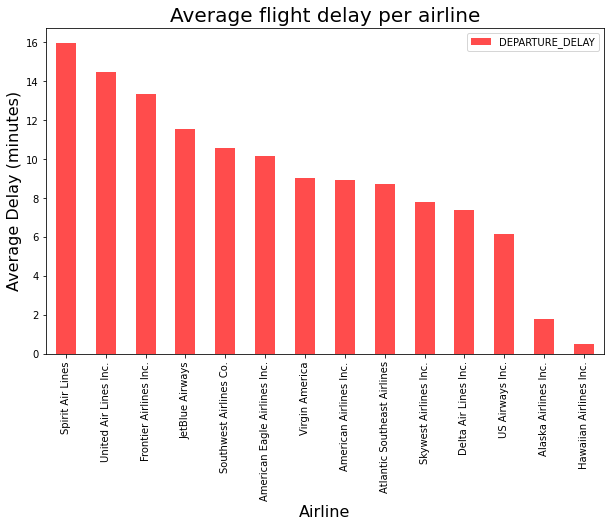

In [934]:
df_avg_delay.plot(kind='bar', stacked = True, figsize = (10, 6), 
                 color = 'red', alpha = 0.7)
plt.title("Average flight delay per airline", size = 20)
plt.xlabel("Airline", size = 16)
plt.ylabel("Average Delay (minutes)", size = 16)


In [923]:
# Question 3
df_30min_join = df_30min_join.sort_values(by = 'delay_fraction', ascending = False)

Text(0, 0.5, 'Delayed Flights / Total Flights')

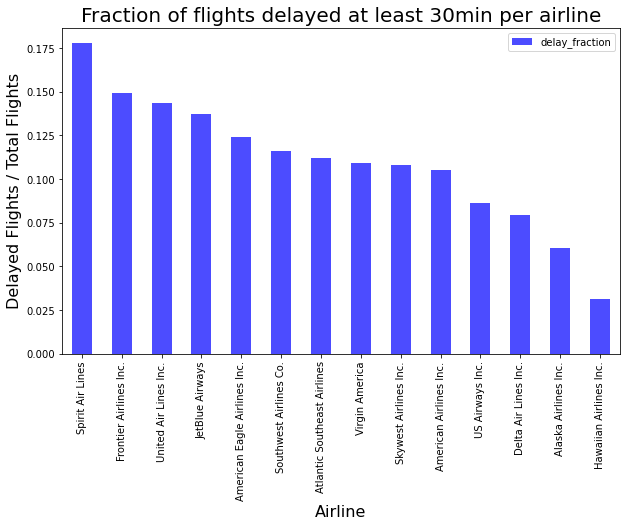

In [933]:
df_30min_join.plot(y='delay_fraction', kind = 'bar', use_index = True,
                  figsize = (10,6), color = 'blue', alpha = .7)
plt.title("Fraction of flights delayed at least 30min per airline", size = 20)
plt.xlabel("Airline", size = 16)
plt.ylabel("Delayed Flights / Total Flights", size = 16)


In [935]:
# Question 4
df_runway_avg = df_runway_avg.sort_values(by = 'runway_time', ascending = False)

Text(0, 0.5, 'Average Runway Time (minutes)')

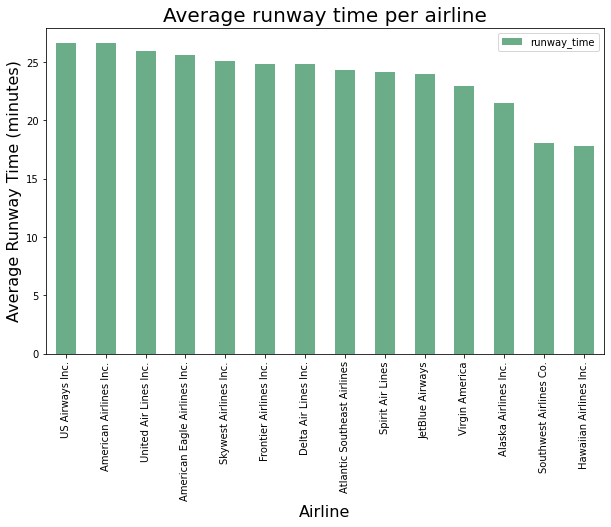

In [944]:
df_runway_avg.plot(y = 'runway_time', kind = 'bar', use_index = True,
                  figsize = (10,6), color = 'seagreen', alpha = .7)
plt.title("Average runway time per airline", size = 20)
plt.xlabel("Airline", size = 16)
plt.ylabel("Average Runway Time (minutes)", size = 16)

Text(0, 0.5, 'Number of flights')

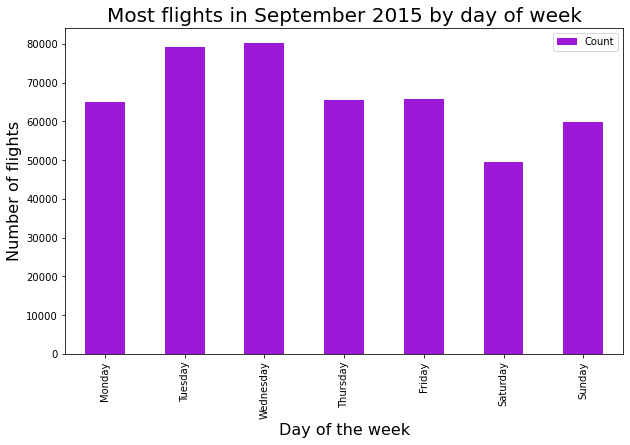

In [965]:
# Question 7
df_sept.plot(kind = 'bar', use_index = True, figsize = (10,6),
            color = 'darkviolet', alpha = .9)
plt.title("Most flights in September 2015 by day of week", size = 20)
plt.xlabel("Day of the week", size = 16)
plt.ylabel("Number of flights", size = 16)

Text(0, 0.5, 'Number of flights')

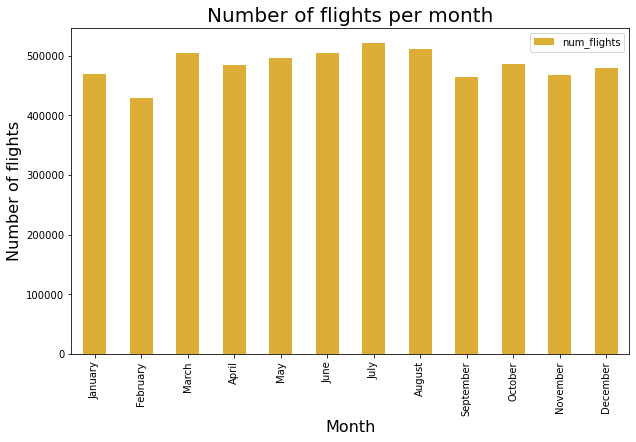

In [976]:
# Question 8
df_month.plot(kind = 'bar', use_index = True, figsize = (10,6),
            color = 'goldenrod', alpha = .9)
plt.title("Number of flights per month", size = 20)
plt.xlabel("Month", size = 16)
plt.ylabel("Number of flights", size = 16)

In [1035]:
# Question 11
df_destination_march = df_destination_march.sort_values(by = 'num_flights')

In [1036]:
df_destination_march = df_destination_march.head(10)

Text(0, 0.5, 'Number of flights')

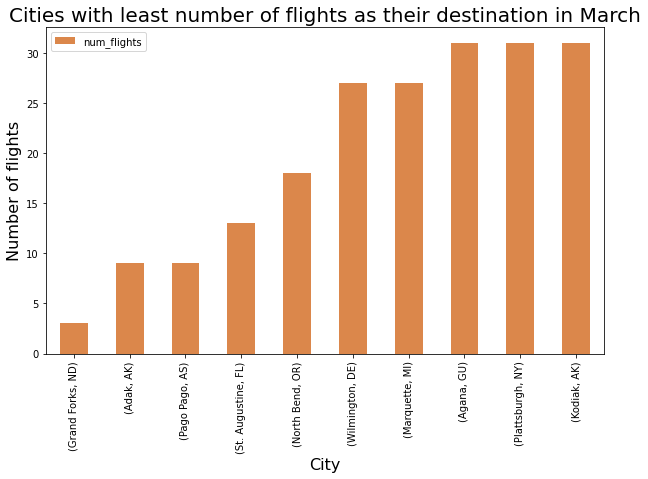

In [1049]:
df_destination_march.plot(kind = 'bar', use_index = True, figsize = (10,6),
                         color = 'chocolate', alpha=.8)
plt.title("Cities with least number of flights as their destination in March", size = 20)
plt.xlabel("City", size = 16)
plt.ylabel("Number of flights", size = 16)

In [1043]:
# Question 12
df_delay = df_delay.sort_values(by = 'departure_delay_per_flight',
                               ascending = False)

In [1045]:
df_delay = df_delay.head(10)

Text(0, 0.5, 'Average Departure Delay (minutes)')

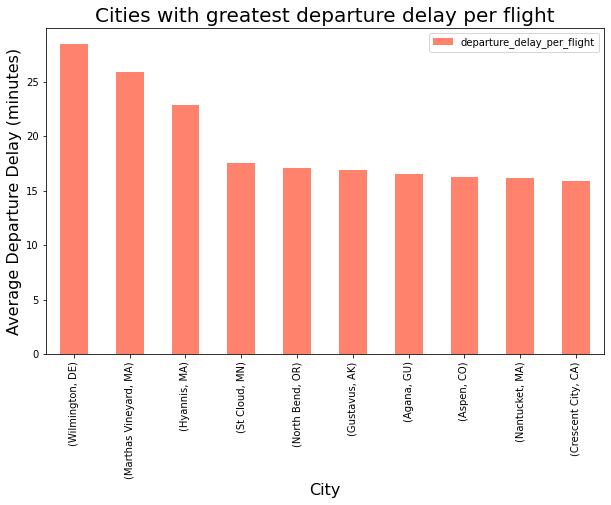

In [1052]:
df_delay.plot(y = 'departure_delay_per_flight', kind = 'bar', use_index = True,
             figsize = (10,6), color = 'tomato', alpha = .8)
plt.title("Cities with greatest departure delay per flight", size = 20)
plt.xlabel("City", size = 16)
plt.ylabel("Average Departure Delay (minutes)", size = 16)
